<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Reading netCDF data</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="https://www.unidata.ucar.edu/images/logos/netcdf-50x50.png" alt="netCDF logo" style="height: 100px;"></div>


- requires [numpy](http://numpy.scipy.org) and netCDF/HDF5 C libraries.
- Github site: https://github.com/Unidata/netcdf4-python
- Online docs: http://unidata.github.io/netcdf4-python/
- Based on Konrad Hinsen's old [Scientific.IO.NetCDF](http://dirac.cnrs-orleans.fr/plone/software/scientificpython/) API, with lots of added netcdf version 4 features.
- Developed by Jeff Whitaker at NOAA, with many contributions from users.

## Interactively exploring a netCDF File

Let's explore a netCDF file from the *Atlantic Real-Time Ocean Forecast System*

first, import netcdf4-python and numpy

In [1]:
import netCDF4
import numpy as np

## Create a netCDF4.Dataset object
- **`f`** is a `Dataset` object, representing an open netCDF file.
- printing the object gives you summary information, similar to *`ncdump -h`*.

In [2]:
f = netCDF4.Dataset('../../data/rtofs_glo_3dz_f006_6hrly_reg3.nc')
print(f) 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: HYCOM ATLb2.00
    institution: National Centers for Environmental Prediction
    source: HYCOM archive file
    experiment: 90.9
    history: archv2ncdf3z
    dimensions(sizes): MT(1), Y(850), X(712), Depth(10)
    variables(dimensions): float64 MT(MT), float64 Date(MT), float32 Depth(Depth), int32 Y(Y), int32 X(X), float32 Latitude(Y,X), float32 Longitude(Y,X), float32 u(MT,Depth,Y,X), float32 v(MT,Depth,Y,X), float32 temperature(MT,Depth,Y,X), float32 salinity(MT,Depth,Y,X)
    groups: 



## Access a netCDF variable
- variable objects stored by name in **`variables`** dict.
- print the variable yields summary info (including all the attributes).
- no actual data read yet (just have a reference to the variable object with metadata).

In [3]:
print(f.variables.keys()) # get all variable names
temp = f.variables['temperature']  # temperature variable
print(temp) 

odict_keys(['MT', 'Date', 'Depth', 'Y', 'X', 'Latitude', 'Longitude', 'u', 'v', 'temperature', 'salinity'])
<class 'netCDF4._netCDF4.Variable'>
float32 temperature(MT, Depth, Y, X)
    coordinates: Longitude Latitude Date
    standard_name: sea_water_potential_temperature
    units: degC
    _FillValue: 1.26765e+30
    valid_range: [ -5.07860279  11.14989948]
    long_name:   temp [90.9H]
unlimited dimensions: MT
current shape = (1, 10, 850, 712)
filling on


## List the Dimensions

- All variables in a netCDF file have an associated shape, specified by a list of dimensions.
- Let's list all the dimensions in this netCDF file.
- Note that the **`MT`** dimension is special (*`unlimited`*), which means it can be appended to.

In [4]:
for d in f.dimensions.items():
    print(d)

('MT', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'MT', size = 1
)
('Y', <class 'netCDF4._netCDF4.Dimension'>: name = 'Y', size = 850
)
('X', <class 'netCDF4._netCDF4.Dimension'>: name = 'X', size = 712
)
('Depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 10
)


Each variable has a **`dimensions`** and a **`shape`** attribute.

In [5]:
temp.dimensions

('MT', 'Depth', 'Y', 'X')

In [6]:
temp.shape

(1, 10, 850, 712)

### Each dimension typically has a variable associated with it (called a *coordinate* variable).
- *Coordinate variables* are 1D variables that have the same name as dimensions.
- Coordinate variables and *auxiliary coordinate variables* (named by the *coordinates* attribute) locate values in time and space.

In [7]:
mt = f.variables['MT']
depth = f.variables['Depth']
x,y = f.variables['X'], f.variables['Y']
print(mt)
print(x)
print(y)

<class 'netCDF4._netCDF4.Variable'>
float64 MT(MT)
    long_name: time
    units: days since 1900-12-31 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: MT
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
int32 X(X)
    point_spacing: even
    axis: X
unlimited dimensions: 
current shape = (712,)
filling on, default _FillValue of -2147483647 used

<class 'netCDF4._netCDF4.Variable'>
int32 Y(Y)
    point_spacing: even
    axis: Y
unlimited dimensions: 
current shape = (850,)
filling on, default _FillValue of -2147483647 used



## Accessing data from a netCDF variable object

- netCDF variables objects behave much like numpy arrays.
- slicing a netCDF variable object returns a numpy array with the data.
- Boolean array and integer sequence indexing behaves differently for netCDF variables than for numpy arrays. Only 1-d boolean arrays and integer sequences are allowed, and these indices work independently along each dimension (similar to the way vector subscripts work in fortran).

In [8]:
time = mt[:]  # Reads the netCDF variable MT, array of one element
print(time) 

[ 41023.25]


In [9]:
dpth = depth[:] # examine depth array
print(depth.dimensions)
print(dpth) 

('Depth',)
[    0.   100.   200.   400.   700.  1000.  2000.  3000.  4000.  5000.]


In [10]:
xx,yy = x[:],y[:]
print('shape of temp variable: %s' % repr(temp.shape))
tempslice = temp[0, dpth > 400, yy > yy.max()/2, xx > xx.max()/2]
print('shape of temp slice: %s' % repr(tempslice.shape))

shape of temp variable: (1, 10, 850, 712)
shape of temp slice: (6, 425, 356)


## What is the sea surface temperature and salinity at 50N, 140W?
### Finding the latitude and longitude indices of 50N, 140W

- The `X` and `Y` dimensions don't look like longitudes and latitudes
- Use the auxilary coordinate variables named in the `coordinates` variable attribute, `Latitude` and `Longitude`

In [11]:
print(x[:])

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [12]:
lat, lon = f.variables['Latitude'], f.variables['Longitude']
print(lat)
print(lon)
print(lat[:])

<class 'netCDF4._netCDF4.Variable'>
float32 Latitude(Y, X)
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (850, 712)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 Longitude(Y, X)
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (850, 712)
filling on, default _FillValue of 9.969209968386869e+36 used

[[ 45.77320099  45.77320099  45.77320099 ...,  45.77320099  45.77320099
   45.77320099]
 [ 45.82899857  45.82899857  45.82899857 ...,  45.82899857  45.82899857
   45.82899857]
 [ 45.88470078  45.88470078  45.88470078 ...,  45.88470078  45.88470078
   45.88470078]
 ..., 
 [ 78.36325073  78.34516144  78.32701111 ...,  56.40559387  56.36401367
   56.32240677]
 [ 78.38998413  78.37184906  78.35365295 ...,  56.41108322  56.36948395
   56.32785034]
 [ 78.41667938  78.39850616  78.38025665 ...,  56.4165535   56.37493134
   56.33327103]]


Aha!  So we need to find array indices `iy` and `ix` such that `Latitude[iy, ix]` is close to 50.0 and `Longitude[iy, ix]` is close to -140.0 ...

In [13]:
# extract lat/lon values (in degrees) to numpy arrays
latvals = lat[:]; lonvals = lon[:] 
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def getclosest_ij(lats,lons,latpt,lonpt):
    # find squared distance of every point on grid
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2  
    # 1D index of minimum dist_sq element
    minindex_flattened = dist_sq.argmin()    
    # Get 2D index for latvals and lonvals arrays from 1D index
    return np.unravel_index(minindex_flattened, lats.shape)
iy_min, ix_min = getclosest_ij(latvals, lonvals, 50., -140)
print(iy_min)
print(ix_min)


122
486


### Now we have all the information we need to find our answer.

<table align="left">
  <tr>
    <th>Variable</th>
    <th>Index</th> 
  </tr>
  <tr>
    <td>MT</td>
    <td>0</td> 
  </tr>
  <tr>
    <td>Depth</td>
    <td>0</td> 
  </tr>
  <tr>
    <td>Y</td>
    <td>`iy_min`</td> 
  </tr>
  <tr>
    <td>X</td>
    <td>`ix_min`</td> 
  </tr>
</table>

### What is the sea surface temperature and salinity at the specified point?

In [14]:
sal = f.variables['salinity']
# Read values out of the netCDF file for temperature and salinity
print('%7.4f %s' % (temp[0,0,iy_min,ix_min], temp.units))
print('%7.4f %s' % (sal[0,0,iy_min,ix_min], sal.units))

 6.4631 degC
32.6572 psu


## Remote data access via openDAP

- Remote data can be accessed seamlessly with the netcdf4-python API
- Access happens via the DAP protocol and DAP servers, such as TDS.
- many formats supported, like GRIB, are supported "under the hood".

The following example showcases some nice netCDF features:

1. We are seamlessly accessing **remote** data, from a TDS server.
2. We are seamlessly accessing **GRIB2** data, as if it were netCDF data.
3. We are generating **metadata** on-the-fly.

In [15]:
from siphon.catalog import get_latest_access_url
URL = get_latest_access_url('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml',
                            'OPENDAP')
gfs = netCDF4.Dataset(URL)
print(gfs.variables.keys())

odict_keys(['lat', 'lon', 'reftime', 'time', 'time1', 'time2', 'isobaric', 'height_above_ground_layer', 'height_above_ground', 'sigma', 'depth_below_surface_layer', 'pressure_difference_layer', 'isobaric1', 'isobaric2', 'height_above_ground1', 'height_above_ground2', 'isobaric3', 'altitude_above_msl', 'height_above_ground3', 'height_above_ground_layer1', 'pressure_difference_layer1', 'isobaric4', 'pressure_difference_layer2', 'sigma_layer', 'height_above_ground4', 'isobaric5', 'potential_vorticity_surface', 'LatLon_Projection', 'time_bounds', 'height_above_ground_layer_bounds', 'depth_below_surface_layer_bounds', 'pressure_difference_layer_bounds', 'height_above_ground_layer1_bounds', 'pressure_difference_layer1_bounds', 'pressure_difference_layer2_bounds', 'sigma_layer_bounds', 'Absolute_vorticity_isobaric', 'Albedo_surface_Mixed_intervals_Average', 'Apparent_temperature_height_above_ground', 'Cloud_mixing_ratio_isobaric', 'Cloud_water_entire_atmosphere_single_layer', 'Convective_avai

In [16]:
# Look at metadata for a specific variable
# gfs.variables.keys() will show all available variables.
sfctmp = gfs.variables['Temperature_surface']
# get info about sfctmp
print(sfctmp)
# print coord vars associated with this variable
for dname in sfctmp.dimensions:   
    print(gfs.variables[dname])

<class 'netCDF4._netCDF4.Variable'>
float32 Temperature_surface(time2, lat, lon)
    long_name: Temperature @ Ground or water surface
    units: K
    abbreviation: TMP
    missing_value: nan
    grid_mapping: LatLon_Projection
    coordinates: reftime time2 lat lon 
    Grib_Variable_Id: VAR_0-0-0_L1
    Grib2_Parameter: [0 0 0]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Temperature
    Grib2_Parameter_Name: Temperature
    Grib2_Level_Type: Ground or water surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (93, 361, 720)
filling off

<class 'netCDF4._netCDF4.Variable'>
float64 time2(time2)
    units: Hour since 2017-04-19T12:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (93,)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
  

## Missing values
- when `data == var.missing_value` somewhere, a masked array is returned.
- illustrate with soil moisture data (only defined over land)
- white areas on plot are masked values over water.

In [17]:
soilmvar = gfs.variables['Volumetric_Soil_Moisture_Content_depth_below_surface_layer']
print(soilmvar)
print(soilmvar.missing_value)

<class 'netCDF4._netCDF4.Variable'>
float32 Volumetric_Soil_Moisture_Content_depth_below_surface_layer(time2, depth_below_surface_layer, lat, lon)
    long_name: Volumetric Soil Moisture Content @ Depth below land surface layer
    units: Fraction
    abbreviation: SOILW
    missing_value: nan
    grid_mapping: LatLon_Projection
    coordinates: reftime time2 depth_below_surface_layer lat lon 
    Grib_Variable_Id: VAR_2-0-192_L106_layer
    Grib2_Parameter: [  2   0 192]
    Grib2_Parameter_Discipline: Land surface products
    Grib2_Parameter_Category: Vegetation/Biomass
    Grib2_Parameter_Name: Volumetric Soil Moisture Content
    Grib2_Level_Type: Depth below land surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (93, 4, 361, 720)
filling off

nan


In [18]:
# flip the data in latitude so North Hemisphere is up on the plot
soilm = soilmvar[0,0,::-1,:] 
print('shape=%s, type=%s, missing_value=%s' % \
      (soilm.shape, type(soilm), soilmvar.missing_value))

shape=(361, 720), type=<class 'numpy.ma.core.MaskedArray'>, missing_value=nan


/Users/johnleeman/anaconda/envs/unidata-workshop/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


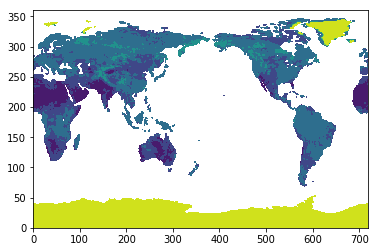

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
cs = plt.contourf(soilm)

## Packed integer data
There is a similar feature for variables with `scale_factor` and `add_offset` attributes.

- short integer data will automatically be returned as float data, with the scale and offset applied.  

## Dealing with dates and times
- time variables usually measure relative to a fixed date using a certain calendar, with units specified like ***`hours since YY:MM:DD hh-mm-ss`***.
- **`num2date`** and **`date2num`** convenience functions provided to convert between these numeric time coordinates and handy python datetime instances.  
- **`date2index`** finds the time index corresponding to a datetime instance.

In [20]:
from netCDF4 import num2date, date2num, date2index
timedim = sfctmp.dimensions[0] # time dim name
print('name of time dimension = %s' % timedim)

name of time dimension = time2


In [21]:
times = gfs.variables[timedim] # time coord var
print('units = %s, values = %s' % (times.units, times[:]))

units = Hour since 2017-04-19T12:00:00Z, values = [   0.    3.    6.    9.   12.   15.   18.   21.   24.   27.   30.   33.
   36.   39.   42.   45.   48.   51.   54.   57.   60.   63.   66.   69.
   72.   75.   78.   81.   84.   87.   90.   93.   96.   99.  102.  105.
  108.  111.  114.  117.  120.  123.  126.  129.  132.  135.  138.  141.
  144.  147.  150.  153.  156.  159.  162.  165.  168.  171.  174.  177.
  180.  183.  186.  189.  192.  195.  198.  201.  204.  207.  210.  213.
  216.  219.  222.  225.  228.  231.  234.  237.  240.  252.  264.  276.
  288.  300.  312.  324.  336.  348.  360.  372.  384.]


In [22]:
dates = num2date(times[:], times.units)
print([date.strftime('%Y-%m-%d %H:%M:%S') for date in dates[:10]]) # print only first ten...

['2017-04-19 12:00:00', '2017-04-19 15:00:00', '2017-04-19 18:00:00', '2017-04-19 21:00:00', '2017-04-20 00:00:00', '2017-04-20 03:00:00', '2017-04-20 06:00:00', '2017-04-20 09:00:00', '2017-04-20 12:00:00', '2017-04-20 15:00:00']


### Get index associated with a specified date, extract forecast data for that date.

In [23]:
import datetime as dt
date = dt.datetime.now() + dt.timedelta(days=3)
print(date)
ntime = date2index(date,times,select='nearest')
print('index = %s, date = %s' % (ntime, dates[ntime]))

2017-04-22 13:47:23.829583
index = 25, date = 2017-04-22 15:00:00


### Get temp forecast for Boulder (near 40N, -105W)
- use function **`getclosest_ij`** we created before...

In [24]:
lats, lons = gfs.variables['lat'][:], gfs.variables['lon'][:]
# lats, lons are 1-d. Make them 2-d using numpy.meshgrid.
lons, lats = np.meshgrid(lons,lats)
j, i = getclosest_ij(lats,lons,40,-105)
fcst_temp = sfctmp[ntime,j,i]
print('Boulder forecast valid at %s UTC = %5.1f %s' % \
      (dates[ntime],fcst_temp,sfctmp.units))

Boulder forecast valid at 2017-04-22 15:00:00 UTC = 294.6 K


## Simple multi-file aggregation

What if you have a bunch of netcdf files, each with data for a different year, and you want to access all the data as if it were in one file?

In [25]:
!ls -l ../data/prmsl*nc

ls: ../data/prmsl*nc: No such file or directory


**`MFDataset`** uses file globbing to patch together all the files into one big Dataset.
You can also pass it a list of specific files.

Limitations:

- It can only  aggregate the data along the leftmost dimension of each variable.
- only works with `NETCDF3`, or `NETCDF4_CLASSIC` formatted files.
- kind of slow.

In [26]:
mf = netCDF4.MFDataset('../../data/prmsl*nc')
times = mf.variables['time']
dates = num2date(times[:],times.units)
print('starting date = %s' % dates[0])
print('ending date = %s'% dates[-1])
prmsl = mf.variables['prmsl']
print('times shape = %s' % times.shape)
print('prmsl dimensions = %s, prmsl shape = %s' %\
     (prmsl.dimensions, prmsl.shape))

starting date = 2000-01-01 00:00:00
ending date = 2011-12-31 00:00:00
times shape = 4383
prmsl dimensions = ('time', 'lat', 'lon'), prmsl shape = (4383, 91, 180)


## Closing your netCDF file

It's good to close netCDF files, but not actually necessary when Dataset is open for read access only.


In [27]:
f.close()
gfs.close()

## That's it!

Now you're ready to start exploring your data interactively.

To be continued with [Writing netCDF data](./netCDF-Writing.ipynb) ....